## Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Function


In [3]:
# Remove Outliers
def remove_outliers(df, col):
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Import Data


In [4]:
# Load dataset
data = pd.read_csv("Mall_Customers.csv")

Explore Data


In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Cleaning of the Data


In [9]:
# Columns names need some changes
data.rename(
    columns={
        "CustomerID": "customer_id",
        "Age": "age",
        "Gender": "gender",
        "Annual Income (k$)": "annual_income",
        "Spending Score (1-100)": "spending_score",
    },
    inplace=True,  # to replace new names into Dataset
)
# convert income from k$  to $
data["annual_income"] = data["annual_income"] * 1000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


M Mean = 62227.27272727273
F Mean = 59250.0


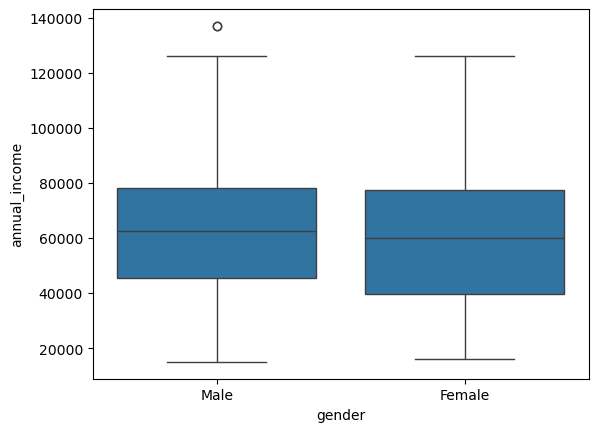

In [11]:
# Check for outliers
sns.boxplot(data = data,x= 'gender',y='annual_income')
print(f'M Mean = {data[data['gender'] == 'Male']['annual_income'].mean()}')
print(f'F Mean = {data[data['gender'] == 'Female']['annual_income'].mean()}')
plt.show()

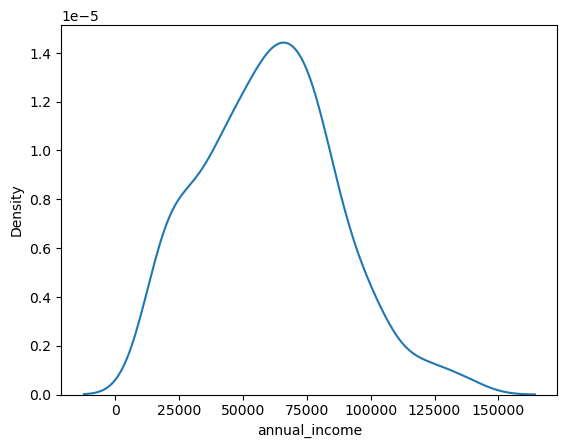

In [12]:
sns.kdeplot(data, x="annual_income")
plt.show()

AS data are normally distribted and number of outliers is tiny, so I decided to keep them because they have meaningful meaning and small impact on insights


M Mean = 48.51136363636363
F Mean = 51.526785714285715


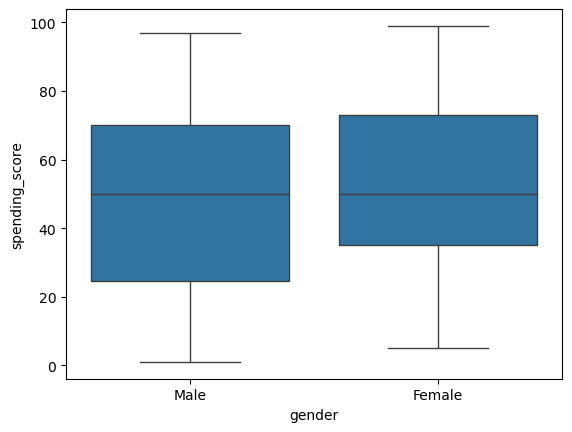

In [13]:
# Check for outliers
sns.boxplot(data = data,x= 'gender',y='spending_score')
print(f'M Mean = {data[data['gender'] == 'Male']['spending_score'].mean()}')
print(f'F Mean = {data[data['gender'] == 'Female']['spending_score'].mean()}')

### Visualization to investigate meaningful insights


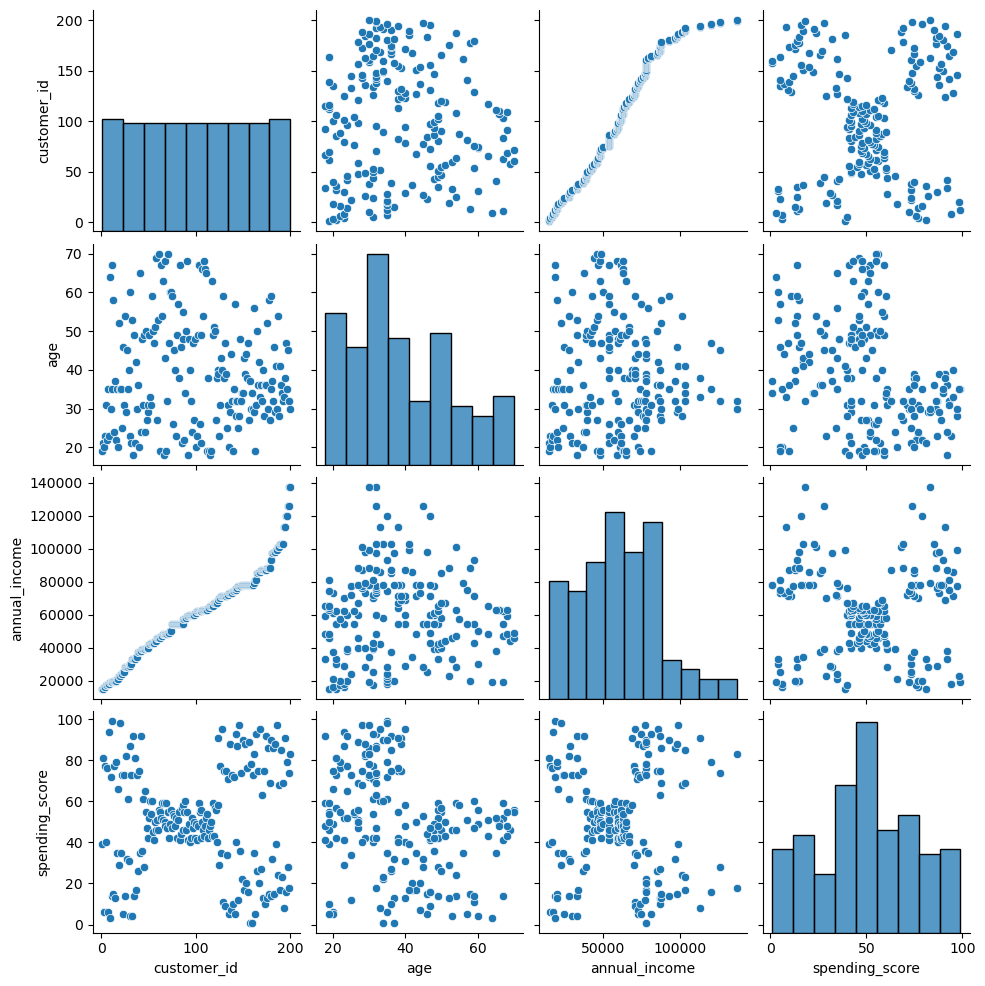

In [14]:
sns.pairplot(data)
plt.show()

gender
Female    112
Male       88
Name: count, dtype: int64


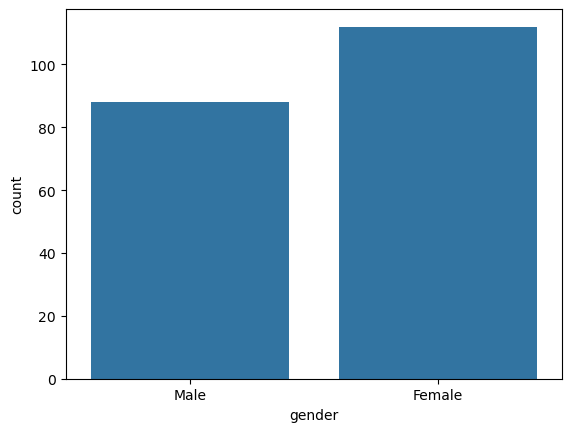

In [15]:
sns.countplot(data=data, x="gender")
print(data["gender"].value_counts())
plt.show()

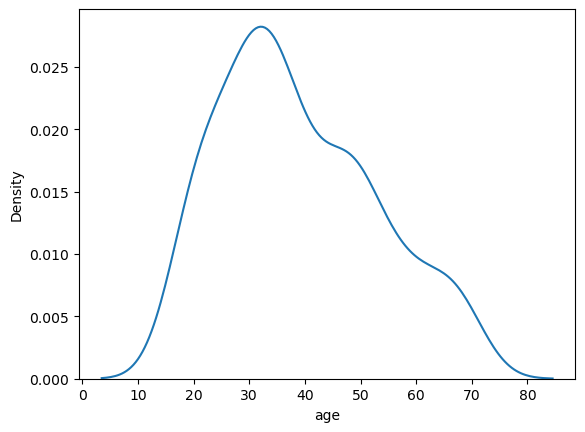

In [16]:
# Age Distribution
sns.kdeplot(data, x="age")
plt.show()

Classify Age to be easy in Visualization


In [17]:
np.sort(data["age"].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70],
      dtype=int64)

In [18]:
data["age"].replace([x for x in range(18, 26)], "18-25", inplace=True)
data["age"].replace([x for x in range(26, 36)], "26-35", inplace=True)
data["age"].replace([x for x in range(36, 46)], "36-45", inplace=True)
data["age"].replace([x for x in range(46, 56)], "46-55", inplace=True)
data["age"].replace([x for x in range(56, 71)], "55+", inplace=True)

C:\Users\EL Mester\AppData\Local\Temp\ipykernel_21684\3263642314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].replace([x for x in range(18, 26)], "18-25", inplace=True)


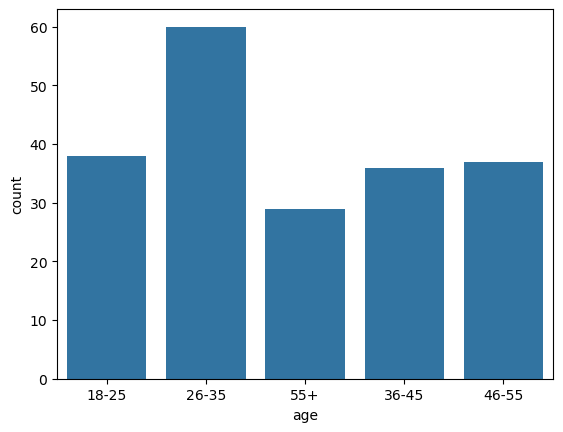

In [19]:
sns.countplot(data, x="age")
plt.show()

Investigation of Annual Income


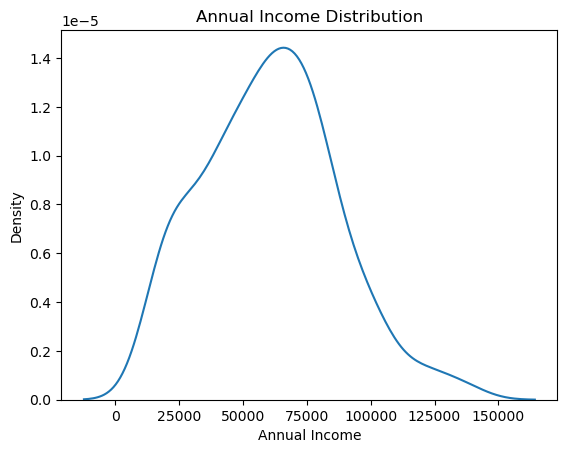

In [20]:
sns.kdeplot(data, x="annual_income")
plt.xlabel("Annual Income")
plt.title("Annual Income Distribution")
plt.show()

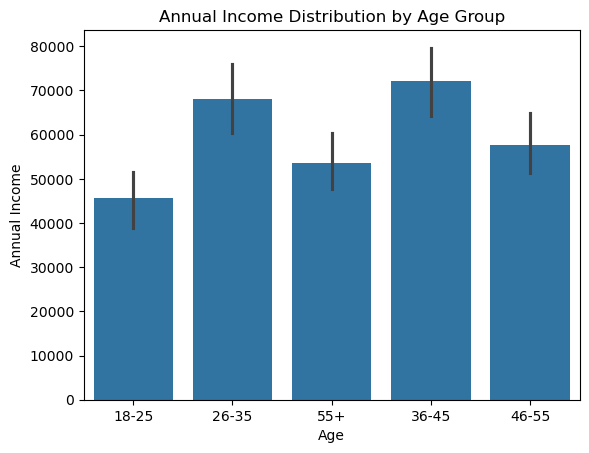

In [21]:
sns.barplot(data, x="age", y="annual_income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Annual Income Distribution by Age Group")


plt.show()

gender
Female    59250.000000
Male      62227.272727
Name: annual_income, dtype: float64


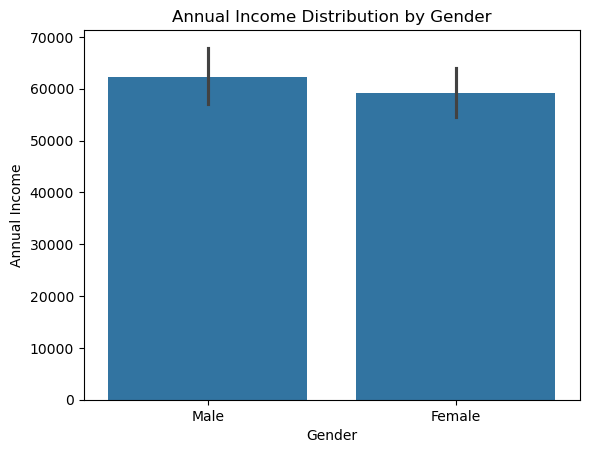

In [22]:
sns.barplot(data=data, x="gender", y="annual_income", estimator="mean")
print(data.groupby("gender")["annual_income"].mean())
plt.xlabel("Gender")
plt.ylabel("Annual Income")
plt.title("Annual Income Distribution by Gender")
plt.show()

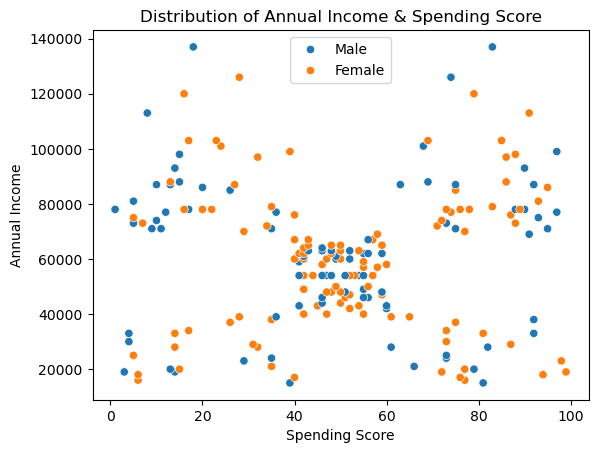

In [23]:
sns.scatterplot(data, x="spending_score", y="annual_income", hue="gender")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.title("Distribution of Annual Income & Spending Score")
plt.legend()
plt.show()

Investigation of Spending Score Column


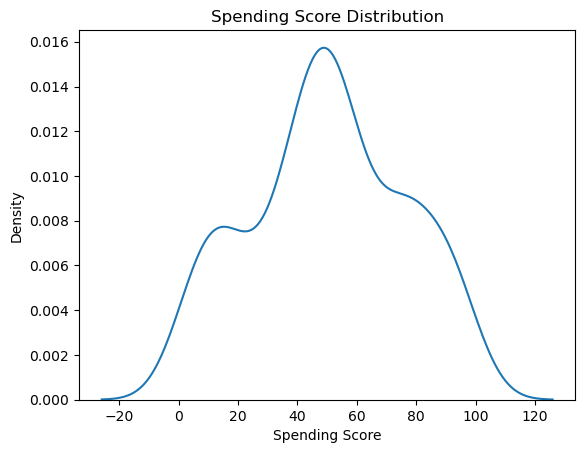

In [24]:
sns.kdeplot(data, x="spending_score")
plt.xlabel("Spending Score")
plt.title("Spending Score Distribution")
plt.show()

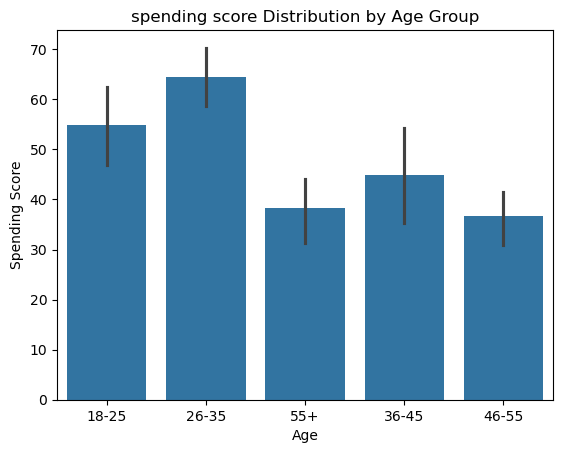

In [25]:
sns.barplot(data, x="age", y="spending_score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("spending score Distribution by Age Group")


plt.show()

gender
Female    51.526786
Male      48.511364
Name: spending_score, dtype: float64


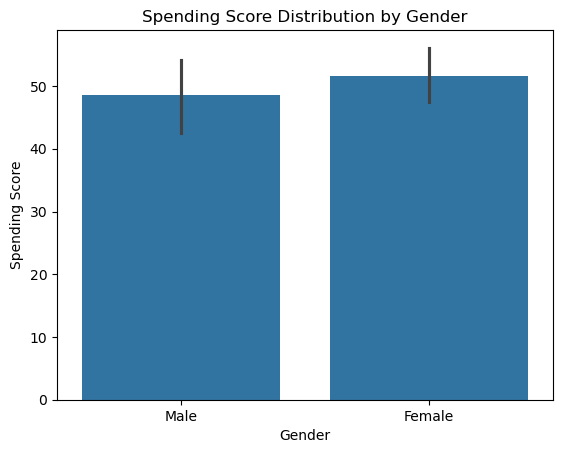

In [26]:
sns.barplot(data = data,x = 'gender',y = 'spending_score',estimator='mean')
print(f'{data.groupby('gender')['spending_score'].mean()}')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Spending Score Distribution by Gender')
plt.show()